# HoneyBee Clinical Processing Tutorial

This notebook provides a comprehensive exploration of HoneyBee's clinical data processing pipeline, demonstrating all key features including:

- Document processing (PDF, images, EHR formats)
- OCR capabilities with medical terminology verification
- Integration with biomedical language models
- Clinical entity recognition and normalization
- Temporal timeline extraction
- Cancer-specific entity extraction
- Ontology linking

## Table of Contents

1. [Setup and Imports](#setup)
2. [Basic Usage](#basic-usage)
3. [Custom Configuration](#custom-config)
4. [Processing Raw Text](#raw-text)
5. [Batch Processing](#batch-processing)
6. [Advanced Tokenization](#advanced-tokenization)
7. [Cancer-Specific Entity Extraction](#cancer-entities)
8. [Temporal Timeline Construction](#temporal-timeline)
9. [Entity Normalization and Ontology Linking](#ontology-linking)
10. [PDF and OCR Processing](#pdf-processing)
11. [Visualization and Analysis](#visualization)

## 1. Setup and Imports <a id='setup'></a>

### a.  Setup Google Drive and Clone HoneyBee Git Repo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


#### **NOTE:** Ignore '/content/drive/MyDrive/HoneyBee_MayoWorkshop/HoneyBee/.git/hooks/post-checkout': Permission denied. This can happen in environments like Colab when interacting with mounted file systems like Google Drive due to how permissions are handled. The core git clone command likely completed successfully, but this specific script failed to execute. For many repositories, the default hooks are not critical for basic usage. You can confirm if the cloning was successful by listing the contents of the HoneyBee_MayoWorkshop directory in your Google Drive. If the HoneyBee directory exists there, the cloning itself was mostly successful.


---



In [2]:
%%bash
cd /content/drive/MyDrive/
mkdir -p HoneyBee_MayoWorkshop
cd HoneyBee_MayoWorkshop

In [3]:
!git clone https://github.com/lab-rasool/HoneyBee.git

fatal: destination path 'HoneyBee' already exists and is not an empty directory.


### b. Install Dependencies

In [4]:
!apt-get update
!apt-get install -y openslide-tools tesseract-ocr

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [5]:
# Standard library imports
import json
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import sys
sys.path.append('/content/drive/MyDrive/HoneyBee_MayoWorkshop/HoneyBee')

### c. Install packages, Restart the Session if asked and rerun all previous cells again

In [6]:
!pip install -r /content/drive/MyDrive/HoneyBee_MayoWorkshop/HoneyBee/requirements.txt

In [ ]:
# if any of the below mentioned package installation fails, uncomment the following line to install that package
#!pip install SimpleITK pytesseract PyPDF2 pdf2image pydicom

In [7]:
from honeybee.processors.clinical_processor import ClinicalProcessor

# Set up visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("HoneyBee Clinical Processing Pipeline loaded successfully!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


HoneyBee Clinical Processing Pipeline loaded successfully!


## 2. Basic Usage <a id='basic-usage'></a>

Let's start with the simplest use case - processing a clinical document with default settings.

❗Grant access if you get the following pop-up: ❗
##  Notebook titled "clinical_processing_tutorial.ipynb" does not have access to secret named "HF_TOKEN". Grant access?

In [8]:
# Initialize the clinical processor with default configuration
processor = ClinicalProcessor()

# Sample clinical text
sample_clinical_text = """
PATIENT: Jane Doe
DATE: 03/15/2023

CHIEF COMPLAINT:
Follow-up for breast cancer treatment.

HISTORY OF PRESENT ILLNESS:
Ms. Doe is a 55-year-old female diagnosed with invasive ductal carcinoma of the left breast
on 01/10/2023. Tumor measured 2.3 cm, Grade 2, ER positive (95%), PR positive (80%),
HER2 negative. Staging: T2N0M0, Stage IIA.

TREATMENT HISTORY:
- Lumpectomy performed on 02/15/2023
- Started adjuvant tamoxifen 20mg daily on 03/01/2023
- Radiation therapy planned for next month

CURRENT MEDICATIONS:
1. Tamoxifen 20mg PO daily
2. Metformin 500mg PO BID
3. Lisinopril 10mg PO daily

LABORATORY RESULTS:
WBC: 6.8 K/µL (normal 4.5-11.0)
Hemoglobin: 13.2 g/dL (normal 12.0-16.0)
Platelets: 225 K/µL (normal 150-400)
Creatinine: 0.8 mg/dL (normal 0.6-1.2)
"""

# Process the clinical text
result = processor.process_text(sample_clinical_text, document_type="clinical_note")

# Display basic results
print("📋 Processing Results:")
print(f"- Text length: {len(result.get('text', ''))} characters")
print(f"- Entities extracted: {len(result.get('entities', []))}")
print(f"- Timeline events: {len(result.get('temporal_timeline', []))}")
print(f"- Document sections: {len(result.get('document_structure', {}).get('sections', {}))}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/534 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

📋 Processing Results:
- Text length: 769 characters
- Entities extracted: 25
- Timeline events: 4
- Document sections: 8


In [9]:
# Display extracted entities
print("\n🔍 Extracted Entities:")
print("=" * 60)

entities_df = pd.DataFrame(result.get('entities', []))
if not entities_df.empty:
    # Group entities by type
    entity_types = entities_df.groupby('type').size().sort_values(ascending=False)

    for entity_type, count in entity_types.items():
        print(f"\n{entity_type.upper()} ({count}):")
        type_entities = entities_df[entities_df['type'] == entity_type]
        for _, entity in type_entities.iterrows():
            print(f"  • {entity['text']}")
            if pd.notna(entity.get('properties')):
                props = entity['properties']
                if isinstance(props, dict):
                    for key, value in props.items():
                        if key not in ['source', 'pattern']:
                            print(f"    - {key}: {value}")


🔍 Extracted Entities:

STAGING (5):
  • Grade 2
  • T2
  • N0
  • M0
  • Stage IIA

TEMPORAL (4):
  • 03/15/2023
    - temporal_type: date
    - normalized_date: 2023-03-15T00:00:00
  • 01/10/2023
    - temporal_type: date
    - normalized_date: 2023-01-10T00:00:00
  • 02/15/2023
    - temporal_type: date
    - normalized_date: 2023-02-15T00:00:00
  • 03/01/2023
    - temporal_type: date
    - normalized_date: 2023-03-01T00:00:00

MEASUREMENT (4):
  • 2.3 cm
    - size: 2.3
    - unit: cm
  • WBC: 6.8 K/
    - test_name: WBC
    - value: 6.8
    - unit: K/
  • Hemoglobin: 13.2 g/dL
    - test_name: Hemoglobin
    - value: 13.2
    - unit: g/dL
  • Platelets: 225 K/
    - test_name: Platelets
    - value: 225
    - unit: K/

MEDICATION (3):
  • tamoxifen 20mg daily
    - drug_name: tamoxifen
    - dose: 20
    - unit: mg
    - frequency: daily
  • Tamoxifen 20mg PO
    - drug_name: Tamoxifen
    - dose: 20
    - unit: mg
    - frequency: PO
  • Metformin 500mg PO
    - drug_name: Metfo

In [10]:
# Display temporal timeline
print("\n📅 Temporal Timeline:")
print("=" * 60)

timeline = result.get('temporal_timeline', [])
if timeline:
    timeline_df = pd.DataFrame(timeline)

    for idx, event in enumerate(timeline):
        print(f"\nEvent {idx + 1}:")
        print(f"  Date text: {event['temporal_text']}")
        if event.get('normalized_date'):
            print(f"  Normalized: {event['normalized_date']}")

        # Show related clinical information
        if event.get('related_entities'):
            print("  Related clinical information:")
            for entity_idx in event['related_entities']:
                if entity_idx < len(result['entities']):
                    entity = result['entities'][entity_idx]
                    print(f"    - {entity['type']}: {entity['text']}")
else:
    print("No temporal events found in the document.")


📅 Temporal Timeline:

Event 1:
  Date text: 01/10/2023
  Normalized: 2023-01-10T00:00:00
  Related clinical information:
    - tumor: carcinoma
    - tumor: breast
    - measurement: 2.3 cm
    - staging: Grade 2
    - biomarker: ER positive
    - biomarker: PR positive
    - biomarker: HER2 negative

Event 2:
  Date text: 02/15/2023
  Normalized: 2023-02-15T00:00:00
  Related clinical information:
    - biomarker: HER2 negative
    - staging: T2
    - staging: N0
    - staging: M0
    - staging: Stage IIA
    - medication: tamoxifen 20mg daily

Event 3:
  Date text: 03/01/2023
  Normalized: 2023-03-01T00:00:00
  Related clinical information:
    - medication: tamoxifen 20mg daily
    - medication: Tamoxifen 20mg PO

Event 4:
  Date text: 03/15/2023
  Normalized: 2023-03-15T00:00:00
  Related clinical information:
    - tumor: breast
    - response: PR


## 3. Custom Configuration <a id='custom-config'></a>

Now let's explore custom configurations for different use cases.

In [11]:
# Configuration for detailed cancer analysis
cancer_config = {
    "document_processor": {
        "use_ocr": True,
        "use_ehr": True
    },
    "tokenization": {
        "model": "gatortron",  # Best for clinical notes
        "max_length": 512,
        "segment_strategy": "sentence",
        "long_document_strategy": "sliding_window"
    },
    "entity_recognition": {
        "use_rules": True,
        "use_patterns": True,
        "cancer_specific_extraction": True,
        "temporal_extraction": True,
        "abbreviation_expansion": True,
        "ontologies": ["snomed_ct", "rxnorm", "loinc"]
    },
    "processing_pipeline": ["document", "tokenization", "entity_recognition"],
    "output": {
        "include_raw_text": True,
        "include_tokens": True,
        "include_entities": True,
        "include_document_structure": True,
        "include_temporal_timeline": True
    }
}

# Initialize processor with custom configuration
cancer_processor = ClinicalProcessor(config=cancer_config)

print("✅ Custom processor initialized with cancer-specific configuration")
print("\nConfiguration highlights:")
print(f"- Model: {cancer_config['tokenization']['model']}")
print(f"- Cancer-specific extraction: {cancer_config['entity_recognition']['cancer_specific_extraction']}")
print(f"- Ontologies: {', '.join(cancer_config['entity_recognition']['ontologies'])}")

✅ Custom processor initialized with cancer-specific configuration

Configuration highlights:
- Model: gatortron
- Cancer-specific extraction: True
- Ontologies: snomed_ct, rxnorm, loinc


In [12]:
# Compare different model configurations
models_to_compare = [
    {"name": "Bio-ClinicalBERT", "model": "bioclinicalbert"},
    {"name": "PubMedBERT", "model": "pubmedbert"},
    {"name": "GatorTron", "model": "gatortron"},
]

comparison_results = []

for model_info in models_to_compare:
    config = {
        "tokenization": {
            "model": model_info["model"],
            "max_length": 512
        },
        "entity_recognition": {
            "cancer_specific_extraction": True
        }
    }

    try:
        processor = ClinicalProcessor(config=config)
        result = processor.process_text(sample_clinical_text, "clinical_note")

        comparison_results.append({
            "Model": model_info["name"],
            "Entities": len(result.get('entities', [])),
            "Timeline Events": len(result.get('temporal_timeline', [])),
            "Status": "✅ Success"
        })
    except Exception as e:
        comparison_results.append({
            "Model": model_info["name"],
            "Entities": 0,
            "Timeline Events": 0,
            "Status": f"❌ Error: {str(e)[:30]}..."
        })

# Display comparison
comparison_df = pd.DataFrame(comparison_results)
display(HTML(comparison_df.to_html(index=False)))

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Model,Entities,Timeline Events,Status
Bio-ClinicalBERT,25,4,✅ Success
PubMedBERT,25,4,✅ Success
GatorTron,25,4,✅ Success


## 4. Processing Raw Text <a id='raw-text'></a>

Process different types of clinical documents directly from text.

In [13]:
# Different types of clinical documents
clinical_documents = {
    "progress_note": """
Patient presents with stage III non-small cell lung cancer.
EGFR mutation positive (exon 19 deletion).
Started on erlotinib 150mg daily.
Partial response observed after 3 months of treatment.
Mild rash managed with topical corticosteroids.
""",

    "pathology_report": """
DIAGNOSIS:
Invasive ductal carcinoma, Grade 2, measuring 2.1 cm.
ER positive (90%), PR positive (75%), HER2 negative.
T2N0M0 stage IIA. Margins clear.
Ki-67 proliferation index: 15%
""",

    "radiology_report": """
CT CHEST WITH CONTRAST
INDICATION: Follow-up lung cancer
FINDINGS:
Right upper lobe mass measures 3.2 x 2.8 cm, decreased from 4.5 x 3.9 cm.
No new pulmonary nodules. No pleural effusion.
IMPRESSION: Partial response to treatment.
"""
}

# Process each document type
processor = ClinicalProcessor()
document_results = {}

for doc_type, text in clinical_documents.items():
    result = processor.process_text(text, document_type=doc_type)
    document_results[doc_type] = result

    print(f"\n📄 {doc_type.replace('_', ' ').title()}:")
    print("=" * 50)

    # Extract key information based on document type
    entities = result.get('entities', [])

    if doc_type == "pathology_report":
        # Focus on tumor characteristics
        tumor_info = [e for e in entities if e['type'] in ['tumor', 'staging', 'biomarker']]
        print("Tumor Characteristics:")
        for entity in tumor_info:
            print(f"  • {entity['type']}: {entity['text']}")

    elif doc_type == "progress_note":
        # Focus on treatment and response
        treatment_info = [e for e in entities if e['type'] in ['medication', 'response', 'condition']]
        print("Treatment Information:")
        for entity in treatment_info:
            print(f"  • {entity['type']}: {entity['text']}")

    elif doc_type == "radiology_report":
        # Focus on measurements and findings
        findings = [e for e in entities if e['type'] in ['measurement', 'condition', 'response']]
        print("Key Findings:")
        for entity in findings:
            print(f"  • {entity['type']}: {entity['text']}")


📄 Progress Note:
Treatment Information:
  • response: pr
  • medication: erlotinib 150mg daily
  • response: Partial response

📄 Pathology Report:
Tumor Characteristics:
  • tumor: carcinoma
  • staging: Grade 2
  • biomarker: ER positive
  • biomarker: PR positive
  • biomarker: HER2 negative
  • staging: T2
  • staging: N0
  • staging: M0
  • staging: stage IIA

📄 Radiology Report:
Key Findings:
  • measurement: 2.8 cm
  • response: cr
  • measurement: 3.9 cm
  • response: PR
  • response: Partial response


## 5. Batch Processing <a id='batch-processing'></a>

Process multiple clinical documents efficiently in batch mode.

In [14]:
# Create a temporary directory with sample files for batch processing
import tempfile
import os

# Create temporary directory
temp_dir = tempfile.mkdtemp(prefix="clinical_batch_")
print(f"Created temporary directory: {temp_dir}")

# Create sample clinical documents
sample_docs = [
    ("patient_001_note.txt", "Patient 001: Breast cancer, Stage II, ER/PR positive, started tamoxifen."),
    ("patient_002_note.txt", "Patient 002: Lung cancer, EGFR positive, on erlotinib 150mg daily."),
    ("patient_003_note.txt", "Patient 003: Colorectal cancer, KRAS wild-type, receiving FOLFOX chemotherapy."),
    ("patient_004_note.txt", "Patient 004: Melanoma, BRAF V600E mutation, started dabrafenib and trametinib."),
]

# Write sample files
for filename, content in sample_docs:
    filepath = os.path.join(temp_dir, filename)
    with open(filepath, 'w') as f:
        f.write(content)
    print(f"Created: {filename}")

# Process batch
processor = ClinicalProcessor()
batch_results = processor.process_batch(
    input_dir=temp_dir,
    file_pattern="*.txt",
    save_output=False  # Don't save JSON files for this demo
)

print(f"\n✅ Processed {len(batch_results)} documents")

# Analyze batch results
batch_summary = []
for result in batch_results:
    stats = processor.get_summary_statistics(result)
    batch_summary.append({
        "File": Path(result['file_path']).name,
        "Characters": stats['text_length'],
        "Entities": stats['num_entities'],
        "Entity Types": len(stats['entity_types']),
        "Top Entity Type": max(stats['entity_types'].items(), key=lambda x: x[1])[0] if stats['entity_types'] else "None"
    })

# Display summary
batch_df = pd.DataFrame(batch_summary)
display(HTML(batch_df.to_html(index=False)))

# Clean up
import shutil
shutil.rmtree(temp_dir)
print(f"\nCleaned up temporary directory")

Created temporary directory: /tmp/clinical_batch_h9mntu6m
Created: patient_001_note.txt
Created: patient_002_note.txt
Created: patient_003_note.txt
Created: patient_004_note.txt

✅ Processed 4 documents


File,Characters,Entities,Entity Types,Top Entity Type
patient_001_note.txt,72,3,3,tumor
patient_002_note.txt,66,3,3,tumor
patient_004_note.txt,78,1,1,tumor
patient_003_note.txt,78,1,1,biomarker



Cleaned up temporary directory


## 6. Advanced Tokenization <a id='advanced-tokenization'></a>

Handle long documents with various tokenization strategies.

In [15]:
# Create a long clinical document
long_clinical_text = """
COMPREHENSIVE ONCOLOGY REPORT

PATIENT IDENTIFICATION:
Name: John Smith
MRN: 12345678
Date of Birth: 01/15/1960
Date of Report: 11/15/2023

DIAGNOSIS AND STAGING:
Primary Diagnosis: Adenocarcinoma of the lung, right upper lobe
Date of Diagnosis: 08/20/2023
Histologic Grade: Moderately differentiated (Grade 2)
Clinical Stage at Diagnosis: cT2aN1M0, Stage IIB
Pathologic Stage: pT2aN1M0, Stage IIB

MOLECULAR PROFILE:
EGFR: Wild type
ALK: Negative by FISH
ROS1: Negative
BRAF: Wild type
PD-L1: 45% tumor proportion score
TMB: 12 mutations/Mb (intermediate)

TREATMENT HISTORY:
1. Surgical Resection (09/15/2023):
   - Right upper lobectomy with mediastinal lymph node dissection
   - Pathology: 3.2 cm adenocarcinoma, margins negative
   - Lymph nodes: 2/15 positive (stations 10R and 11R)

2. Adjuvant Chemotherapy (10/15/2023 - 01/15/2024):
   - Regimen: Carboplatin AUC 5 + Pemetrexed 500 mg/m2
   - Cycles completed: 4 of 4 planned
   - Tolerance: Grade 2 fatigue, Grade 1 nausea

3. Maintenance Therapy (02/01/2024 - ongoing):
   - Pembrolizumab 200 mg IV every 3 weeks
   - Cycles completed: 8 to date
   - Tolerance: Grade 1 arthralgia, no immune-related adverse events

RESPONSE ASSESSMENT:
Most recent imaging (10/30/2023):
- CT chest/abdomen/pelvis: No evidence of disease
- Brain MRI: Negative for metastases
- PET/CT: No FDG-avid disease

CURRENT STATUS:
- Disease status: No evidence of disease (NED)
- Performance status: ECOG 0
- Next imaging: 01/30/2024

RECOMMENDATIONS:
1. Continue pembrolizumab maintenance therapy
2. Surveillance imaging every 3 months
3. Monitor for immune-related adverse events
4. Annual brain MRI given stage at diagnosis
""" * 3  # Make it even longer by repeating

# Test different tokenization strategies
tokenization_strategies = [
    {"name": "Sliding Window", "strategy": "sliding_window"},
    {"name": "Hierarchical", "strategy": "hierarchical"},
    {"name": "Important Segments", "strategy": "important_segments"},
]

tokenization_results = []

for strategy_info in tokenization_strategies:
    config = {
        "tokenization": {
            "model": "gatortron",
            "max_length": 512,
            "segment_strategy": "paragraph",
            "long_document_strategy": strategy_info["strategy"],
            "stride": 128
        }
    }

    processor = ClinicalProcessor(config=config)
    result = processor.process_text(long_clinical_text, "comprehensive_report")

    tokenization = result.get('tokenization', {})

    tokenization_results.append({
        "Strategy": strategy_info["name"],
        "Windows/Sections": tokenization.get('num_windows', tokenization.get('num_segments_selected', len(tokenization.get('sections', {})))),
        "Total Tokens": tokenization.get('num_tokens', 'N/A'),
        "Strategy Used": tokenization.get('tokenization_strategy', 'unknown')
    })

    print(f"\n{strategy_info['name']} Strategy:")
    print("=" * 40)

    if strategy_info["strategy"] == "sliding_window" and 'num_windows' in tokenization:
        print(f"Created {tokenization['num_windows']} overlapping windows")
        print(f"Stride: {config['tokenization']['stride']} tokens")

    elif strategy_info["strategy"] == "hierarchical" and 'sections' in tokenization:
        print(f"Document sections: {len(tokenization['sections'])}")
        for section_name in list(tokenization['sections'].keys())[:3]:
            print(f"  - {section_name}")

    elif strategy_info["strategy"] == "important_segments":
        selected = tokenization.get('num_segments_selected', 0)
        total = tokenization.get('num_segments_total', 0)
        print(f"Selected {selected} of {total} segments based on clinical relevance")

# Display comparison
tokenization_df = pd.DataFrame(tokenization_results)
display(HTML(tokenization_df.to_html(index=False)))


Sliding Window Strategy:
Created 3 overlapping windows
Stride: 128 tokens

Hierarchical Strategy:
Document sections: 1
  - segment_0

Important Segments Strategy:
Selected 0 of 1 segments based on clinical relevance


Strategy,Windows/Sections,Total Tokens,Strategy Used
Sliding Window,3,N/A,sliding_window
Hierarchical,1,N/A,hierarchical
Important Segments,0,2,important_segments


## 7. Cancer-Specific Entity Extraction <a id='cancer-entities'></a>

Extract detailed oncology-specific information.

In [16]:
# Configure for cancer-specific extraction
cancer_config = {
    "entity_recognition": {
        "cancer_specific_extraction": True,
        "temporal_extraction": True,
        "ontologies": ["snomed_ct", "rxnorm"]
    }
}

processor = ClinicalProcessor(config=cancer_config)

# Comprehensive pathology report
pathology_text = """
SURGICAL PATHOLOGY REPORT

FINAL DIAGNOSIS:
1. RIGHT BREAST, UPPER OUTER QUADRANT, EXCISION:
   - INVASIVE DUCTAL CARCINOMA, NOTTINGHAM GRADE 2 (3+2+1=6/9)
   - TUMOR SIZE: 2.1 cm in greatest dimension
   - MARGINS: Negative for invasive carcinoma (closest margin 3 mm)
   - LYMPHOVASCULAR INVASION: Present, focal

2. SENTINEL LYMPH NODES (3), RIGHT AXILLA:
   - ONE OF THREE LYMPH NODES POSITIVE FOR METASTATIC CARCINOMA
   - Largest metastatic deposit: 4 mm
   - Extranodal extension: Not identified

IMMUNOHISTOCHEMISTRY:
- Estrogen Receptor (ER): Positive (90% of tumor cells, strong intensity)
- Progesterone Receptor (PR): Positive (75% of tumor cells, moderate intensity)
- HER2/neu: Negative (1+, not amplified by FISH)
- Ki-67 Proliferation Index: 15%

ONCOTYPE DX RECURRENCE SCORE: 18 (Intermediate risk)

PATHOLOGIC STAGING (AJCC 8th Edition):
- Primary Tumor (pT): pT2 (tumor 2.1 cm)
- Regional Lymph Nodes (pN): pN1a (1-3 axillary lymph nodes)
- Distant Metastasis (pM): pM0
- Stage Group: IIB (pT2 pN1a M0)
"""

result = processor.process_text(pathology_text, "pathology_report")

# Organize entities by cancer-specific categories
cancer_entities = {
    "Tumor Characteristics": [],
    "Biomarkers": [],
    "Staging": [],
    "Measurements": [],
    "Response/Risk": []
}

for entity in result.get('entities', []):
    if entity['type'] == 'tumor':
        cancer_entities["Tumor Characteristics"].append(entity)
    elif entity['type'] == 'biomarker':
        cancer_entities["Biomarkers"].append(entity)
    elif entity['type'] == 'staging':
        cancer_entities["Staging"].append(entity)
    elif entity['type'] == 'measurement' and 'size' in entity.get('properties', {}):
        cancer_entities["Measurements"].append(entity)
    elif entity['type'] == 'response':
        cancer_entities["Response/Risk"].append(entity)

# Display organized cancer entities
print("🔬 Cancer-Specific Entity Extraction Results:")
print("=" * 60)

for category, entities in cancer_entities.items():
    if entities:
        print(f"\n{category}:")
        for entity in entities:
            print(f"  • {entity['text']}")
            props = entity.get('properties', {})
            if isinstance(props, dict):
                # Display relevant properties
                if 'biomarker' in props:
                    print(f"    - Biomarker: {props['biomarker']}")
                if 'status' in props:
                    print(f"    - Status: {props['status']}")
                if 'size' in props:
                    print(f"    - Size: {props['size']} {props.get('unit', '')}")
                if 'stage' in props:
                    print(f"    - Stage: {props['stage']}")
                if 'ontology_links' in props:
                    for link in props['ontology_links']:
                        print(f"    - {link['ontology']}: {link['concept_name']}")

🔬 Cancer-Specific Entity Extraction Results:

Tumor Characteristics:
  • BREAST
  • CARCINOMA
  • carcinoma
  • CARCINOMA

Staging:
  • GRADE 2
  • T2
  • N1a
  • M0
  • T2
  • N1a
  • M0

Measurements:
  • 3 mm
    - Size: 3 mm
  • 2.1 cm
    - Size: 2.1 cm

Response/Risk:
  • Pr
  • Pr
  • PR
  • Pr
  • Pr


In [17]:
# Visualize biomarker distribution
biomarkers = cancer_entities["Biomarkers"]
if biomarkers:
    biomarker_data = []
    for b in biomarkers:
        props = b.get('properties', {})
        if isinstance(props, dict) and 'biomarker' in props:
            biomarker_data.append({
                'Biomarker': props.get('biomarker', 'Unknown'),
                'Status': props.get('status', 'Unknown'),
                'Text': b['text']
            })

    if biomarker_data:
        biomarker_df = pd.DataFrame(biomarker_data)

        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Biomarker counts
        biomarker_counts = biomarker_df['Biomarker'].value_counts()
        ax1.bar(biomarker_counts.index, biomarker_counts.values)
        ax1.set_title('Biomarker Mentions')
        ax1.set_xlabel('Biomarker')
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45)

        # Status distribution
        status_counts = biomarker_df['Status'].value_counts()
        colors = ['green' if 'positive' in s.lower() else 'red' if 'negative' in s.lower() else 'gray'
                 for s in status_counts.index]
        ax2.pie(status_counts.values, labels=status_counts.index, colors=colors, autopct='%1.1f%%')
        ax2.set_title('Biomarker Status Distribution')

        plt.tight_layout()
        plt.show()
else:
    print("No biomarkers found for visualization")

No biomarkers found for visualization


## 8. Temporal Timeline Construction <a id='temporal-timeline'></a>

Extract and visualize patient treatment timelines.

In [18]:
# Clinical note with rich temporal information
timeline_text = """
ONCOLOGY TREATMENT SUMMARY

Patient: Sarah Johnson
DOB: 05/12/1965

TIMELINE OF EVENTS:

January 15, 2023: Initial presentation with palpable breast mass
January 20, 2023: Mammography and ultrasound performed
January 25, 2023: Core needle biopsy confirmed invasive ductal carcinoma
February 1, 2023: Genetic testing revealed BRCA2 mutation
February 10, 2023: PET/CT staging showed no distant metastases
February 15, 2023: Multidisciplinary tumor board recommendation for neoadjuvant chemotherapy

February 20, 2023: Started neoadjuvant chemotherapy (AC-T regimen)
- Doxorubicin 60 mg/m2 + Cyclophosphamide 600 mg/m2 every 2 weeks x 4 cycles
- Completed on April 15, 2023

April 20, 2023: Started weekly paclitaxel 80 mg/m2
- Completed 12 weeks on July 10, 2023

July 25, 2023: Restaging showed partial response (tumor 4.2cm → 1.8cm)

August 15, 2023: Bilateral mastectomy with immediate reconstruction
August 22, 2023: Pathology showed residual invasive carcinoma 1.5 cm, margins clear

September 15, 2023: Started adjuvant capecitabine due to residual disease
Currently on cycle 4 of 8 planned cycles

October 1, 2023: Initiated endocrine therapy with tamoxifen
Planned duration: 10 years given BRCA2 mutation

NEXT STEPS:
- Complete capecitabine in January 2024
- Consider prophylactic bilateral salpingo-oophorectomy given BRCA2
- Surveillance with clinical exams every 3 months
"""

processor = ClinicalProcessor()
result = processor.process_text(timeline_text, "treatment_summary")

# Extract and display timeline
timeline = result.get('temporal_timeline', [])

print("📅 Patient Treatment Timeline:")
print("=" * 60)

# Sort timeline by date if normalized dates are available
timeline_sorted = sorted(timeline, key=lambda x: x.get('normalized_date', '9999'))

# Create timeline visualization data
timeline_data = []

for event in timeline_sorted:
    print(f"\n📌 {event['temporal_text']}")
    if event.get('normalized_date'):
        print(f"   Date: {event['normalized_date']}")

    # Get related clinical events
    related_info = []
    for idx in event.get('related_entities', []):
        if idx < len(result['entities']):
            entity = result['entities'][idx]
            related_info.append(f"{entity['type']}: {entity['text']}")

    if related_info:
        print("   Related events:")
        for info in related_info:
            print(f"   - {info}")

    # Collect for visualization
    if event.get('normalized_date'):
        timeline_data.append({
            'date': event['normalized_date'],
            'event': event['temporal_text'],
            'details': ', '.join(related_info[:2])  # Limit to 2 items for readability
        })

📅 Patient Treatment Timeline:

📌 05/12/1965
   Date: 1965-05-12T00:00:00
   Related events:
   - response: pr
   - tumor: breast

📌 January 15, 2023
   Date: 2023-01-15T00:00:00
   Related events:
   - response: pr
   - tumor: breast

📌 January 20, 2023
   Date: 2023-01-20T00:00:00
   Related events:
   - response: pr
   - tumor: breast

📌 January 25, 2023
   Date: 2023-01-25T00:00:00
   Related events:
   - response: pr
   - tumor: breast
   - tumor: carcinoma

📌 February 1, 2023
   Date: 2023-02-01T00:00:00
   Related events:
   - tumor: carcinoma

📌 February 10, 2023
   Date: 2023-02-10T00:00:00
   Related events:
   - tumor: carcinoma

📌 February 15, 2023
   Date: 2023-02-15T00:00:00

📌 February 20, 2023
   Date: 2023-02-20T00:00:00

📌 July 10, 2023
   Date: 2023-07-10T00:00:00
   Related events:
   - response: pr
   - response: pr
   - response: partial response
   - measurement: 4.2cm
   - measurement: 1.8cm

📌 July 25, 2023
   Date: 2023-07-25T00:00:00
   Related events:
   - re

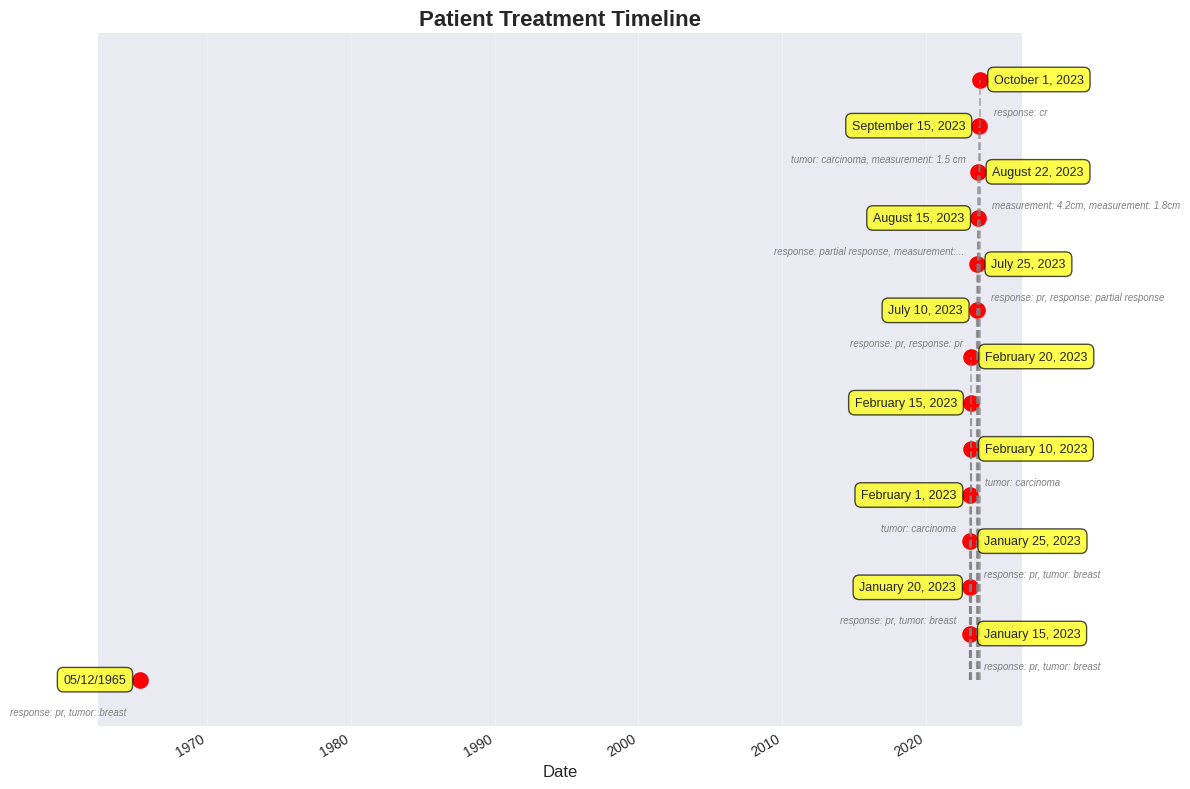

In [ ]:
# Create timeline visualization
if timeline_data:
    # Convert to DataFrame and parse dates
    timeline_df = pd.DataFrame(timeline_data)
    timeline_df['date'] = pd.to_datetime(timeline_df['date'], errors='coerce')
    timeline_df = timeline_df.dropna(subset=['date']).sort_values('date')

    if not timeline_df.empty:
        # Create figure
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plot timeline
        dates = timeline_df['date']
        levels = np.arange(len(dates))

        # Create the timeline
        ax.scatter(dates, levels, s=120, c='red', zorder=2)

        # Add vertical line
        ax.vlines(dates, 0, levels, colors='gray', linestyles='dashed', alpha=0.5)

        # Add event labels
        for i, (date, event, details) in enumerate(zip(dates, timeline_df['event'], timeline_df['details'])):
            # Alternate label positions for readability
            ha = 'right' if i % 2 == 0 else 'left'
            x_offset = -10 if i % 2 == 0 else 10

            ax.annotate(event[:50] + '...' if len(event) > 50 else event,
                       xy=(date, i),
                       xytext=(x_offset, 0),
                       textcoords='offset points',
                       ha=ha,
                       va='center',
                       bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                       fontsize=9)

            # Add details below if available
            if details:
                ax.annotate(details[:40] + '...' if len(details) > 40 else details,
                           xy=(date, i),
                           xytext=(x_offset, -20),
                           textcoords='offset points',
                           ha=ha,
                           va='top',
                           fontsize=7,
                           style='italic',
                           color='gray')

        # Formatting
        ax.set_ylim(-1, len(dates))
        ax.set_xlabel('Date', fontsize=12)
        ax.set_title('Patient Treatment Timeline', fontsize=16, fontweight='bold')
        ax.grid(True, axis='x', alpha=0.3)
        ax.set_yticks([])

        # Format x-axis
        fig.autofmt_xdate()

        plt.tight_layout()
        plt.show()
else:
    print("No timeline data available for visualization")

## 9. Entity Normalization and Ontology Linking <a id='ontology-linking'></a>

Normalize medical terms and link to standard ontologies.

In [ ]:
# Configure with ontology support
ontology_config = {
    "entity_recognition": {
        "ontologies": ["snomed_ct", "rxnorm", "loinc"],
        "abbreviation_expansion": True,
        "term_disambiguation": True
    }
}

processor = ClinicalProcessor(config=ontology_config)

# Text with medical abbreviations and terms
medical_text = """
CLINICAL SUMMARY:
Pt is a 62 yo male with hx of NSCLC, s/p lobectomy.
Currently on tamoxifen 20mg PO daily for breast ca prevention (strong FH).
Recent labs: WBC 8.2, Hgb 13.5, Plt 250, Cr 1.1
CT showed stable post-op changes, no mets.
Plan: Continue surveillance, f/u in 3 mos.
"""

result = processor.process_text(medical_text)

# Display entities with normalization
print("🔗 Entity Normalization and Ontology Linking:")
print("=" * 60)

normalized_entities = []
for entity in result.get('entities', []):
    props = entity.get('properties', {})

    # Check for expanded abbreviations or ontology links
    if isinstance(props, dict) and ('expanded' in props or 'ontology_links' in props):
        normalized_entities.append(entity)

if normalized_entities:
    for entity in normalized_entities:
        print(f"\n📋 Original: '{entity['text']}'")
        print(f"   Type: {entity['type']}")

        props = entity['properties']

        # Show abbreviation expansion
        if 'expanded' in props:
            print(f"   ✅ Expanded to: '{props['expanded']}'")

        # Show ontology links
        if 'ontology_links' in props:
            print("   🔗 Ontology mappings:")
            for link in props['ontology_links']:
                print(f"      - {link['ontology']}: {link['concept_name']} (ID: {link['concept_id']})")
else:
    print("No normalized entities found in this example.")

# Show all entities for comparison
print("\n\nAll extracted entities:")
entity_summary = []
for entity in result.get('entities', []):
    entity_summary.append({
        'Text': entity['text'],
        'Type': entity['type'],
        'Normalized': '✅' if entity.get('properties', {}).get('ontology_links') else '❌'
    })

if entity_summary:
    entity_df = pd.DataFrame(entity_summary)
    display(HTML(entity_df.to_html(index=False)))

🔗 Entity Normalization and Ontology Linking:
No normalized entities found in this example.


All extracted entities:


Text,Type,Normalized
tamoxifen 20mg PO,medication,❌
breast,tumor,❌
pr,response,❌
Cr,response,❌


## 10. PDF and OCR Processing <a id='pdf-processing'></a>

Process scanned documents and PDFs with OCR capabilities.

In [ ]:
# Check if sample PDF exists
pdf_path = Path("/content/drive/MyDrive/HoneyBee_MayoWorkshop/HoneyBee/examples/samples/sample.PDF")

if pdf_path.exists():
    print("📄 Processing PDF Document")
    print("=" * 60)

    # Configure for OCR processing
    ocr_config = {
        "document_processor": {
            "use_ocr": True,
            "confidence_threshold": 60,
            "preprocessing": True
        },
        "entity_recognition": {
            "cancer_specific_extraction": True
        }
    }

    processor = ClinicalProcessor(config=ocr_config)

    try:
        # Process PDF
        pdf_result = processor.process(pdf_path)

        # Display processing information
        doc_info = pdf_result.get('document_processing', {})
        print(f"\n📊 Document Processing Info:")
        print(f"  - Extraction method: {doc_info.get('method', 'unknown')}")
        print(f"  - Confidence score: {doc_info.get('confidence', 'N/A')}")
        print(f"  - Text length: {len(pdf_result.get('text', ''))} characters")
        print(f"  - Entities found: {len(pdf_result.get('entities', []))}")

        # Show extracted text preview
        text = pdf_result.get('text', '')
        if text:
            print(f"\n📝 Extracted Text Preview (first 500 chars):")
            print("=" * 40)
            preview = text[:500].replace('\n', ' ').strip()
            print(preview + "..." if len(text) > 500 else preview)

        # Show any extracted entities
        entities = pdf_result.get('entities', [])
        if entities:
            print(f"\n🔍 Sample Entities from PDF:")
            for entity in entities[:5]:  # Show first 5
                print(f"  - {entity['type']}: {entity['text']}")

    except Exception as e:
        print(f"\n❌ Error processing PDF: {e}")
        print("\nNote: PDF processing requires:")
        print("  - pytesseract (OCR engine)")
        print("  - pdf2image (PDF to image conversion)")
        print("  - Tesseract OCR installed on system")
else:
    print("❌ Sample PDF not found at expected location.")
    print(f"   Expected: {pdf_path}")

    # Create a mock scanned document example
    print("\n📄 Mock OCR Example:")
    print("=" * 60)

    # Simulate OCR-like text with some typical OCR issues
    ocr_text = """
    PATIENT NAME: John 5mith
    DATE: 03/l5/2023

    DIAGN0SIS: Breast ca, Stage IIA

    TREATMENT:
    - Tamoxifen 20mg_ daily
    - F/u in 3 mos
    """

    processor = ClinicalProcessor()
    result = processor.process_text(ocr_text, "scanned_document")

    print("\nProcessing mock OCR text with typical OCR errors...")
    print(f"Entities found: {len(result.get('entities', []))}")

    for entity in result.get('entities', []):
        print(f"  - {entity['type']}: {entity['text']}")

📄 Processing PDF Document

📊 Document Processing Info:
  - Extraction method: direct
  - Confidence score: 0
  - Text length: 1471 characters
  - Entities found: 12

📝 Extracted Text Preview (first 500 chars):
Patient Name: # PATIENT P.N 1 AGE/SEX: M :RIN NAME : ' AGE/SEX: PHYSICIAN:MATH.NO MED. REC. NO: SURGERY DATE: RECEIVE DATE:UUID:4854A37F- 5F68-4EA0-99F7-E0572EA9533F TCGA-06-0150-01A-PR Redacted iii 111111111111111111111111a111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 1111 111 III ---------------------------------------------------------------- PATHOLOGICAL DIAGNOSIS: BRAIN BIOPSY: GLIOBLAST...

🔍 Sample Entities from PDF:
  - measurement: UUID:4854A
  - response: PR
  - tumor: BRAIN
  - response: PR
  - tumor: Brain


## 11. Visualization and Analysis <a id='visualization'></a>

Comprehensive analysis and visualization of clinical processing results.

In [ ]:
# Process multiple document types for analysis
document_types = {
    "Clinical Note": sample_clinical_text,
    "Pathology Report": pathology_text,
    "Treatment Timeline": timeline_text
}

analysis_results = []
all_entities = []

processor = ClinicalProcessor({
    "entity_recognition": {
        "cancer_specific_extraction": True,
        "temporal_extraction": True
    }
})

for doc_type, text in document_types.items():
    result = processor.process_text(text, doc_type.lower().replace(' ', '_'))
    stats = processor.get_summary_statistics(result)

    analysis_results.append({
        'Document Type': doc_type,
        'Text Length': stats['text_length'],
        'Total Entities': stats['num_entities'],
        'Entity Types': len(stats['entity_types']),
        'Timeline Events': stats['num_timeline_events']
    })

    # Collect all entities for type analysis
    for entity in result.get('entities', []):
        all_entities.append({
            'Document': doc_type,
            'Type': entity['type'],
            'Text': entity['text']
        })

# Create summary DataFrame
summary_df = pd.DataFrame(analysis_results)
entities_df = pd.DataFrame(all_entities)

# Display summary
print("📊 Clinical Processing Summary Analysis")
print("=" * 60)
display(HTML(summary_df.to_html(index=False)))

📊 Clinical Processing Summary Analysis


Document Type,Text Length,Total Entities,Entity Types,Timeline Events
Clinical Note,769,25,7,4
Pathology Report,1023,21,4,0
Treatment Timeline,1383,26,4,14


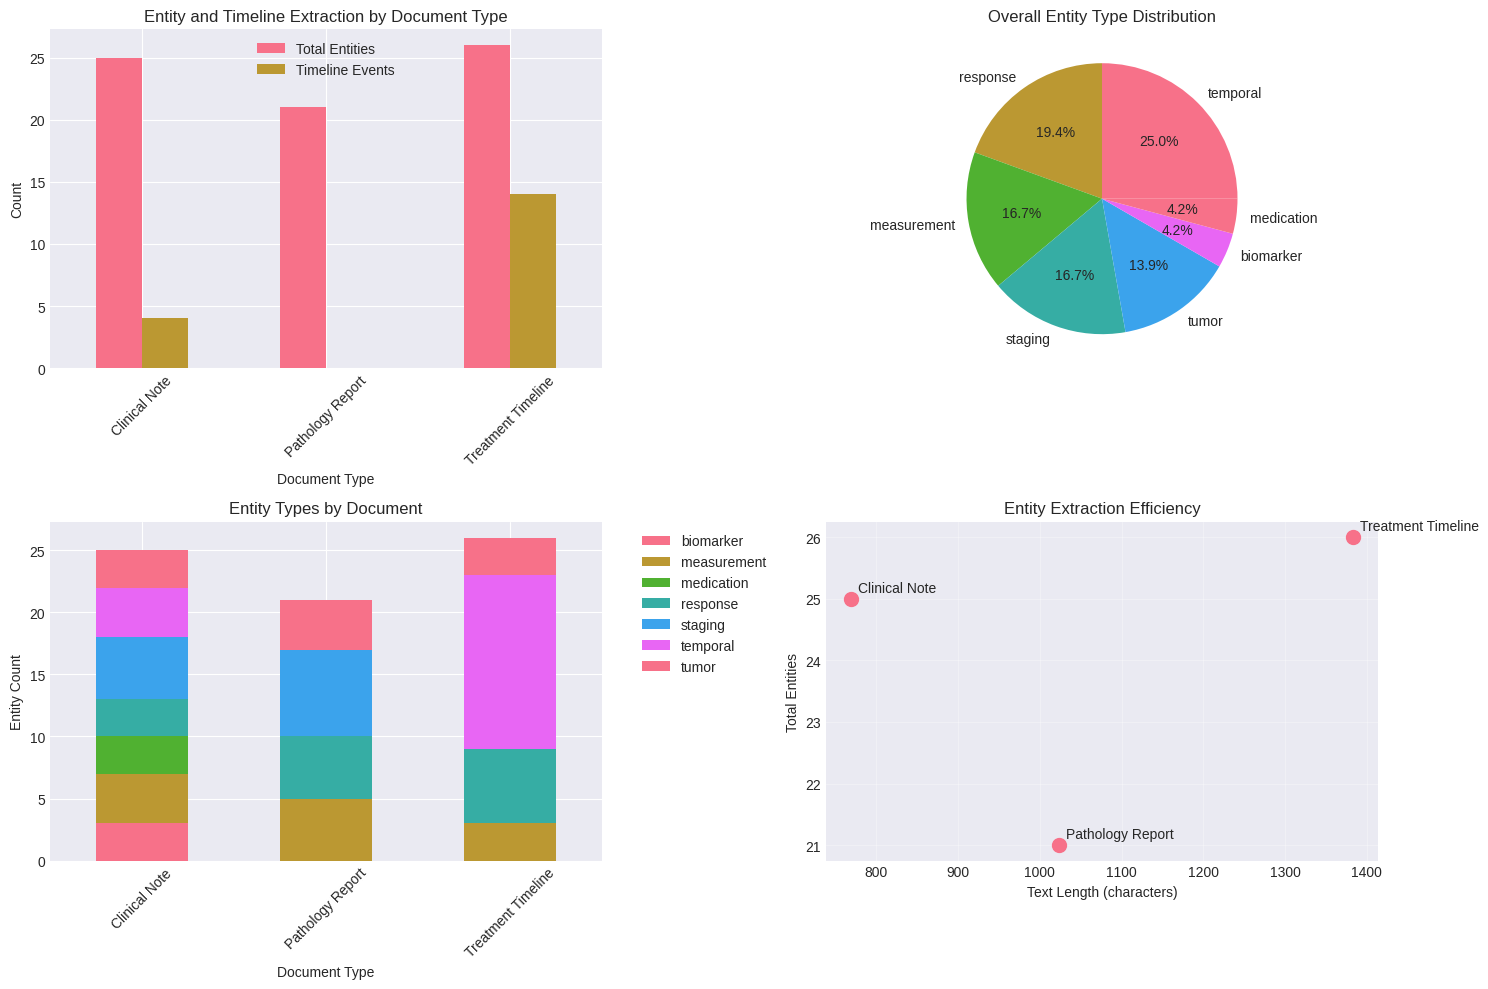

In [ ]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Document comparison
ax1 = axes[0, 0]
summary_df.plot(x='Document Type', y=['Total Entities', 'Timeline Events'],
                kind='bar', ax=ax1)
ax1.set_title('Entity and Timeline Extraction by Document Type')
ax1.set_xlabel('Document Type')
ax1.set_ylabel('Count')
ax1.legend(['Total Entities', 'Timeline Events'])
ax1.tick_params(axis='x', rotation=45)

# 2. Entity type distribution
ax2 = axes[0, 1]
if not entities_df.empty:
    entity_type_counts = entities_df['Type'].value_counts()
    ax2.pie(entity_type_counts.values, labels=entity_type_counts.index, autopct='%1.1f%%')
    ax2.set_title('Overall Entity Type Distribution')
else:
    ax2.text(0.5, 0.5, 'No entities found', ha='center', va='center')
    ax2.set_title('Entity Type Distribution')

# 3. Entity types by document
ax3 = axes[1, 0]
if not entities_df.empty:
    entity_pivot = entities_df.groupby(['Document', 'Type']).size().unstack(fill_value=0)
    entity_pivot.plot(kind='bar', stacked=True, ax=ax3)
    ax3.set_title('Entity Types by Document')
    ax3.set_xlabel('Document Type')
    ax3.set_ylabel('Entity Count')
    ax3.tick_params(axis='x', rotation=45)
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    ax3.text(0.5, 0.5, 'No entities found', ha='center', va='center')
    ax3.set_title('Entity Types by Document')

# 4. Processing metrics
ax4 = axes[1, 1]
metrics = summary_df[['Text Length', 'Total Entities']].values
if metrics.size > 0:
    ax4.scatter(metrics[:, 0], metrics[:, 1], s=100)
    for i, doc in enumerate(summary_df['Document Type']):
        ax4.annotate(doc, (metrics[i, 0], metrics[i, 1]),
                    xytext=(5, 5), textcoords='offset points')
    ax4.set_xlabel('Text Length (characters)')
    ax4.set_ylabel('Total Entities')
    ax4.set_title('Entity Extraction Efficiency')
    ax4.grid(True, alpha=0.3)
else:
    ax4.text(0.5, 0.5, 'No data available', ha='center', va='center')
    ax4.set_title('Entity Extraction Efficiency')

plt.tight_layout()
plt.show()

In [ ]:
# Generate final summary report
print("\n📋 CLINICAL PROCESSING CAPABILITIES SUMMARY")
print("=" * 60)

capabilities = [
    ("✅", "Multiple input formats (PDF, images, EHR formats)"),
    ("✅", "OCR with medical terminology verification"),
    ("✅", "Biomedical language models (GatorTron, Bio-ClinicalBERT, etc.)"),
    ("✅", "Cancer-specific entity extraction"),
    ("✅", "Temporal timeline construction"),
    ("✅", "Medical abbreviation expansion"),
    ("✅", "Ontology linking (SNOMED-CT, RxNorm, LOINC)"),
    ("✅", "Long document handling strategies"),
    ("✅", "Batch processing capabilities"),
    ("✅", "Configurable processing pipelines")
]

for icon, capability in capabilities:
    print(f"{icon} {capability}")

print("\n📊 Processing Statistics from Examples:")
if not entities_df.empty:
    print(f"  - Total documents processed: {len(document_types)}")
    print(f"  - Total entities extracted: {len(entities_df)}")
    print(f"  - Unique entity types: {entities_df['Type'].nunique()}")
    print(f"  - Most common entity type: {entities_df['Type'].mode()[0]}")

print("\n🎯 Key Use Cases:")
use_cases = [
    "Clinical trial eligibility screening",
    "Treatment response monitoring",
    "Quality measure reporting",
    "Research cohort identification",
    "Automated clinical documentation"
]

for use_case in use_cases:
    print(f"  • {use_case}")

print("\n✨ This notebook demonstrated the complete clinical processing pipeline in HoneyBee!")


📋 CLINICAL PROCESSING CAPABILITIES SUMMARY
✅ Multiple input formats (PDF, images, EHR formats)
✅ OCR with medical terminology verification
✅ Biomedical language models (GatorTron, Bio-ClinicalBERT, etc.)
✅ Cancer-specific entity extraction
✅ Temporal timeline construction
✅ Medical abbreviation expansion
✅ Ontology linking (SNOMED-CT, RxNorm, LOINC)
✅ Long document handling strategies
✅ Batch processing capabilities
✅ Configurable processing pipelines

📊 Processing Statistics from Examples:
  - Total documents processed: 3
  - Total entities extracted: 72
  - Unique entity types: 7
  - Most common entity type: temporal

🎯 Key Use Cases:
  • Clinical trial eligibility screening
  • Treatment response monitoring
  • Quality measure reporting
  • Research cohort identification
  • Automated clinical documentation

✨ This notebook demonstrated the complete clinical processing pipeline in HoneyBee!
